In [1]:
import pywt

In [9]:
import numpy as np 
import pandas as pd
import os
folder = './datasets/physiq/segment_sessions_one_repetition_data_E2'
def parser_folder_permuting(folder):
    """
    Parse the folder and return the inputs and labels

    Args:
        folder (_type_): NA
    """
    files = []
    labels_mapping = []
    users_mapping = []
    for file in os.listdir(folder):
        if '.csv' not in file:
            continue
        files.append(file)
        if file.split('_')[3] not in labels_mapping:
            labels_mapping.append(file.split('_')[3])
        if file.split('_')[0] not in users_mapping:
            users_mapping.append(file.split('_')[0])
    
    # sort the labels_mapping:
    
    labels_mapping = sorted(labels_mapping)
    print(labels_mapping)
    # permute the order:
    np.random.shuffle(files)
    inputs = []
    labels = []
    users = []
    transition = []
    cur_value = 0
    for file in files:
        path_file = os.path.join(folder, file)
        df = pd.read_csv(path_file)
        inputs.append(df.iloc[:, 1:7].values)
        labels.append([labels_mapping.index(file.split('_')[3])] * df.shape[0])
        users.append(users_mapping.index(file.split('_')[0]))
        transition.append([cur_value] * df.shape[0])
        cur_value = 1 - cur_value
    
    # inputs = np.concatenate(inputs, axis=0)
    # labels = np.concatenate(labels, axis=0, dtype=int)
    # users = np.concatenate(users, axis=0)
    
    return inputs, labels, users, transition



In [10]:
inputs, _, _, _ = parser_folder_permuting(folder)

['120', '45', '90']


(135,)
(68,) (68,)


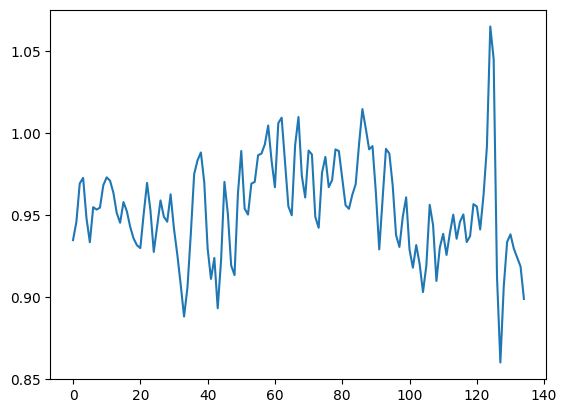

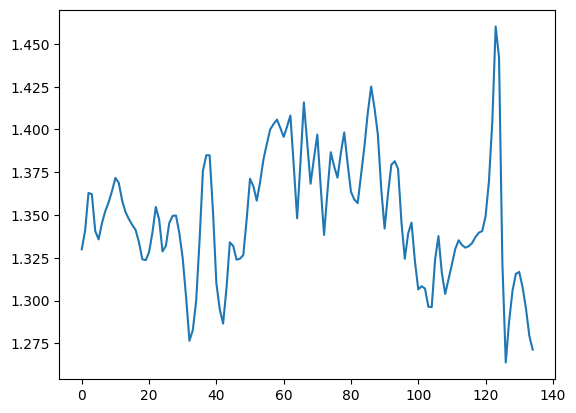

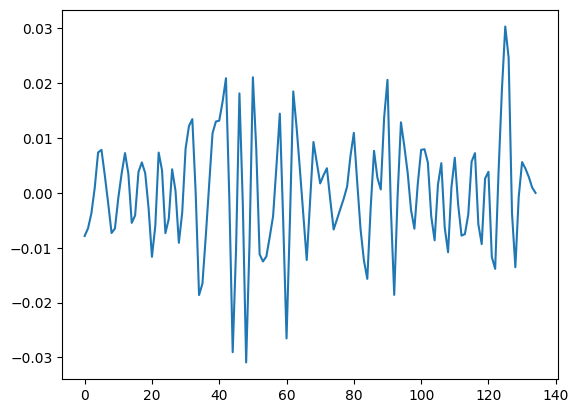

In [54]:
from matplotlib import pyplot as plt

res = pywt.dwt(inputs[0][:, 1], 'db1')
print(inputs[0][:, 1].shape)
print(res[0].shape, res[1].shape)
plt.plot(inputs[0][:, 1])
plt.show()
import torch
res0 = torch.nn.functional.interpolate(torch.tensor(res[0]).unsqueeze(0).unsqueeze(0), size=inputs[0][:, 1].shape[0], mode='linear').squeeze().numpy()

plt.plot(res0)
plt.show()
res1 = torch.nn.functional.interpolate(torch.tensor(res[1]).unsqueeze(0).unsqueeze(0), size=inputs[0][:, 1].shape[0], mode='linear').squeeze().numpy()

plt.plot(res1)
plt.show()